In [1]:
import os, glob
import numpy as np
import pandas as pd
import math
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from statsmodels.stats.weightstats import ztest

In [2]:
base_dir = "/data/projects/DNABERT_snv/Manuscript_11_2023/DBSNP_output/DNABERT_data/core_prom"

In [3]:
output_path = "/data/projects/DNABERT_snv/Manuscript_11_2023/DBSNP_output/Varaiant_Analysis_Data/NonTATA"
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [4]:
def log_oods_ratio(p1,p2):
    term1 = math.log2(p1/(1-p1))
    term2 = math.log2(p2/(1-p2))
    return (term1-term2)
def calculate_diff_probab(p1,p2):
    return((p2-p1)*max(p1,p2))

In [5]:
df_dict = {}
df_list = []
pred_probab = np.load(base_dir+"/pred_NonTATA.npy")
print(len(pred_probab), len(pred_probab)/2)
df = pd.read_csv(base_dir+"/all_data_new.tsv", sep= "\t")
print(df.shape)
Reference_probab = pred_probab[::2]
Alternative_probab = pred_probab[1::2]
df['Ref_probab']=Reference_probab
df['Alt_probab']=Alternative_probab
print(df.shape)
df = df[~((df['Ref_probab'] == 5) | (df['Alt_probab'] == 5))]
df['ScoreChange'] = df.apply(lambda row: calculate_diff_probab(row['Ref_probab'], row['Alt_probab']), axis=1)
df['LogOddRatio'] = df.apply(lambda row: log_oods_ratio(row['Ref_probab'], row['Alt_probab']), axis=1)

19395638 9697819.0
(9697819, 11)
(9697819, 13)


In [6]:
df

,chr,strand,core_prom_coordinates,Ensemble_Transcript_ID,RS_ID,variant_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,ScoreChange,LogOddRatio
0,chr11,+,64305479-64305568,ENST00000000442,rs2035011417,64305479,64305480,C,A,CCCGCCCCCTGCTTTGCATGCGCACGGCCGGCCCCACCCCCGCTGT...,ACCGCCCCCTGCTTTGCATGCGCACGGCCGGCCCCACCCCCGCTGT...,0.991529,0.991592,0.000062,-0.010831
1,chr11,+,64305479-64305568,ENST00000000442,rs1279195484,64305481,64305482,C,A,CCCGCCCCCTGCTTTGCATGCGCACGGCCGGCCCCACCCCCGCTGT...,CCAGCCCCCTGCTTTGCATGCGCACGGCCGGCCCCACCCCCGCTGT...,0.991529,0.992276,0.000741,-0.134275
2,chr11,+,64305479-64305568,ENST00000000442,rs1414580223,64305482,64305483,G,A,CCCGCCCCCTGCTTTGCATGCGCACGGCCGGCCCCACCCCCGCTGT...,CCCACCCCCTGCTTTGCATGCGCACGGCCGGCCCCACCCCCGCTGT...,0.991529,0.986426,-0.005059,0.687633
3,chr11,+,64305479-64305568,ENST00000000442,rs2035011529,64305483,64305484,C,A,CCCGCCCCCTGCTTTGCATGCGCACGGCCGGCCCCACCCCCGCTGT...,CCCGACCCCTGCTTTGCATGCGCACGGCCGGCCCCACCCCCGCTGT...,0.991529,0.979262,-0.012163,1.309631
4,chr11,+,64305479-64305568,ENST00000000442,rs2035011529,64305483,64305484,C,T,CCCGCCCCCTGCTTTGCATGCGCACGGCCGGCCCCACCCCCGCTGT...,CCCGTCCCCTGCTTTGCATGCGCACGGCCGGCCCCACCCCCGCTGT...,0.991529,0.990381,-0.001138,0.184996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9697814,chr2,-,85888732-85888821,ENST00000640992,rs1350089366,85888813,85888814,C,A,GCGCCCAGCCGGCCCGGGAAGAGACAAGTCGCCGCCGCAGCCCCCA...,GCGCCCAGCCGGCCCGGGAAGAGACAAGTCGCCGCCGCAGCCCCCA...,0.995190,0.995322,0.000132,-0.040563
9697815,chr2,-,85888732-85888821,ENST00000640992,rs1350089366,85888813,85888814,C,T,GCGCCCAGCCGGCCCGGGAAGAGACAAGTCGCCGCCGCAGCCCCCA...,GCGCCCAGCCGGCCCGGGAAGAGACAAGTCGCCGCCGCAGCCCCCA...,0.995190,0.995221,0.000031,-0.009389
9697816,chr2,-,85888732-85888821,ENST00000640992,rs1438222811,85888816,85888817,C,A,GCGCCCAGCCGGCCCGGGAAGAGACAAGTCGCCGCCGCAGCCCCCA...,GCGCCCAGCCGGCCCGGGAAGAGACAAGTCGCCGCCGCAGCCCCCA...,0.995190,0.994009,-0.001175,0.318484
9697817,chr2,-,85888732-85888821,ENST00000640992,rs1438222811,85888816,85888817,C,T,GCGCCCAGCCGGCCCGGGAAGAGACAAGTCGCCGCCGCAGCCCCCA...,GCGCCCAGCCGGCCCGGGAAGAGACAAGTCGCCGCCGCAGCCCCCA...,0.995190,0.994363,-0.000822,0.229880


In [8]:
df.to_csv(output_path+"/NonTATA_raw_SNV.tsv", sep= "\t", index=False)

In [131]:
df[df['Ref_probab']>0.5][['chr','core_prom_coordinates']].drop_duplicates().reset_index(drop=True).to_csv(output_path + "/predicted_nonTATA.tsv", sep="\t", index=False)
df[df['Ref_probab']>0.5][['chr','core_prom_coordinates']].drop_duplicates().reset_index(drop=True)

,chr,core_prom_coordinates
0,chr11,64305479-64305568
1,chr11,113875526-113875615
2,chr11,3379072-3379161
3,chr11,17544372-17544461
4,chr11,60924436-60924525
...,...,...
148843,chr2,85854131-85854220
148844,chr2,74416539-74416628
148845,chr2,85870195-85870284
148846,chr2,85888718-85888807


In [86]:
df[['chr','core_prom_coordinates', 'Ensemble_Transcript_ID']].drop_duplicates().reset_index(drop=True)

,chr,core_prom_coordinates,Ensemble_Transcript_ID
0,chr11,64305479-64305568,ENST00000000442
1,chr11,113875526-113875615,ENST00000003302
2,chr11,3379072-3379161,ENST00000005082
3,chr11,17544372-17544461,ENST00000005226
4,chr11,60924436-60924525,ENST00000005286
...,...,...,...
193710,chr2,74416539-74416628,ENST00000640868
193711,chr2,131379631-131379720,ENST00000640874
193712,chr2,85870195-85870284,ENST00000640903
193713,chr2,85888718-85888807,ENST00000640982


In [87]:
df[['chr','core_prom_coordinates']].drop_duplicates().reset_index(drop=True)

,chr,core_prom_coordinates
0,chr11,64305479-64305568
1,chr11,113875526-113875615
2,chr11,3379072-3379161
3,chr11,17544372-17544461
4,chr11,60924436-60924525
...,...,...
177212,chr2,74416539-74416628
177213,chr2,131379631-131379720
177214,chr2,85870195-85870284
177215,chr2,85888718-85888807


In [88]:
df[['RS_ID', 'variant_start','variant_end']].drop_duplicates().reset_index(drop=True)

,RS_ID,variant_start,variant_end
0,rs2035011417,64305479,64305480
1,rs1279195484,64305481,64305482
2,rs1414580223,64305482,64305483
3,rs2035011529,64305483,64305484
4,rs1339490525,64305483,64305488
...,...,...,...
5013843,rs575453668,131379702,131379703
5013844,rs117940763,131379703,131379704
5013845,rs113872181,131379711,131379712
5013846,rs1427777532,131379713,131379714


In [89]:
#df_interest = df_interest[((df_interest['Ref_probab']>0.5) & (df_interest['Alt_probab']<0.5))|((df_interest['Ref_probab']<0.5) & (df_interest['Alt_probab']>0.5))]
# df_interest = concatenated_df[(concatenated_df['Ref_probab']>0.5)|(concatenated_df['Alt_probab']>0.5)]
# df_interest
filtered_df1 = df[(df['Ref_probab'] >= 0.5) & (df['Alt_probab'] < 0.5)]
#filtered_df2 = df[(df['Ref_probab'] < 0.5) & (df['Alt_probab'] > 0.5)]
df_interest = filtered_df1
df_interest 

,chr,strand,core_prom_coordinates,Ensemble_Transcript_ID,RS_ID,variant_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,ScoreChange,LogOddRatio
168,chr11,-,3379072-3379161,ENST00000005082,rs1203817043,3379075,3379076,G,A,TCTGGATCTCCCGGTGCCTGCGGGTCACACGACCTACGGCTAGCAG...,TCTAGATCTCCCGGTGCCTGCGGGTCACACGACCTACGGCTAGCAG...,0.643893,0.180161,-0.298593,3.040560
169,chr11,-,3379072-3379161,ENST00000005082,rs766216432,3379076,3379077,G,A,TCTGGATCTCCCGGTGCCTGCGGGTCACACGACCTACGGCTAGCAG...,TCTGAATCTCCCGGTGCCTGCGGGTCACACGACCTACGGCTAGCAG...,0.643893,0.452738,-0.123083,1.128060
173,chr11,-,3379072-3379161,ENST00000005082,rs754697033,3379090,3379091,T,G,TCTGGATCTCCCGGTGCCTGCGGGTCACACGACCTACGGCTAGCAG...,TCTGGATCTCCCGGTGCCGGCGGGTCACACGACCTACGGCTAGCAG...,0.643893,0.412903,-0.148733,1.362305
175,chr11,-,3379072-3379161,ENST00000005082,rs1021936900,3379094,3379095,G,A,TCTGGATCTCCCGGTGCCTGCGGGTCACACGACCTACGGCTAGCAG...,TCTGGATCTCCCGGTGCCTGCGAGTCACACGACCTACGGCTAGCAG...,0.643893,0.427249,-0.139495,1.277340
177,chr11,-,3379072-3379161,ENST00000005082,rs1467010217,3379096,3379096,.,A,TCTGGATCTCCCGGTGCCTGCGGGTCACACGACCTACGGCTAGCAG...,TCTGGATCTCCCGGTGCCTGCGGGATCACACGACCTACGGCTAGCA...,0.643893,0.385168,-0.166591,1.529211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9697458,chr2,-,85854131-85854220,ENST00000640798,rs1025041484,85854173,85854174,T,C,TATTTCCGTATTACTTGAATTTTTGGTGTTTTTTTTAAATAATTGA...,TATTTCCGTATTACTTGAATTTTTGGTGTTTTTTTTAAATAACTGA...,0.525017,0.481950,-0.022611,0.248695
9697460,chr2,-,85854131-85854220,ENST00000640798,rs1485540647,85854187,85854188,C,G,TATTTCCGTATTACTTGAATTTTTGGTGTTTTTTTTAAATAATTGA...,TATTTCCGTATTACTTGAATTTTTGGTGTTTTTTTTAAATAATTGA...,0.525017,0.388536,-0.071655,0.798705
9697461,chr2,-,85854131-85854220,ENST00000640798,rs912144056,85854189,85854190,T,C,TATTTCCGTATTACTTGAATTTTTGGTGTTTTTTTTAAATAATTGA...,TATTTCCGTATTACTTGAATTTTTGGTGTTTTTTTTAAATAATTGA...,0.525017,0.449949,-0.039412,0.434293
9697468,chr2,-,85854131-85854220,ENST00000640798,rs999351413,85854208,85854209,T,G,TATTTCCGTATTACTTGAATTTTTGGTGTTTTTTTTAAATAATTGA...,TATTTCCGTATTACTTGAATTTTTGGTGTTTTTTTTAAATAATTGA...,0.525017,0.335036,-0.099743,1.133446


In [90]:
df_interest [['RS_ID', 'variant_start','variant_end']].drop_duplicates()

,RS_ID,variant_start,variant_end
168,rs1203817043,3379075,3379076
169,rs766216432,3379076,3379077
173,rs754697033,3379090,3379091
175,rs1021936900,3379094,3379095
177,rs1467010217,3379096,3379096
...,...,...,...
9697458,rs1025041484,85854173,85854174
9697460,rs1485540647,85854187,85854188
9697461,rs912144056,85854189,85854190
9697468,rs999351413,85854208,85854209


In [91]:
df_interest[['chr','core_prom_coordinates']].drop_duplicates()

,chr,core_prom_coordinates
168,chr11,3379072-3379161
388,chr11,60492733-60492822
876,chr11,64924644-64924733
2207,chr11,125903162-125903251
2395,chr11,60842068-60842157
...,...,...
9697121,chr2,85850154-85850243
9697186,chr2,102761918-102762007
9697377,chr2,85861173-85861262
9697430,chr2,165194948-165195037


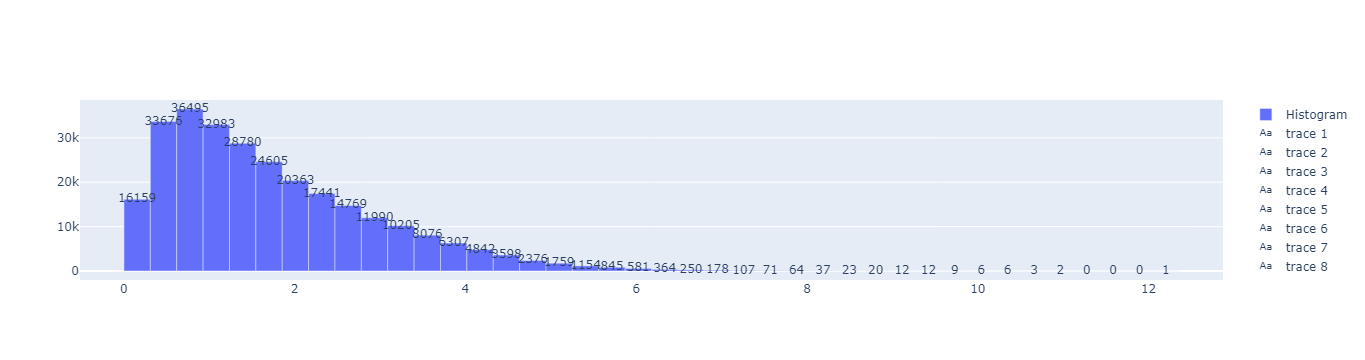

In [92]:
# Plot the figure
counts, bins = np.histogram(df_interest['LogOddRatio'], bins=40)
bin_midpoints = bins[:-1] + np.diff(bins)/2

fig = go.Figure()

fig.add_trace(go.Bar(
    x=bin_midpoints,
    y=counts,
    width=np.diff(bins), # makes bars have correct widths
    name='Histogram'
))
# add text labels for counts
for i in range(len(counts)):
    fig.add_trace(go.Scatter(
        x=[bin_midpoints[i]],
        y=[counts[i]],
        text=[str(counts[i])],
        mode='text',
    ))

fig.show()

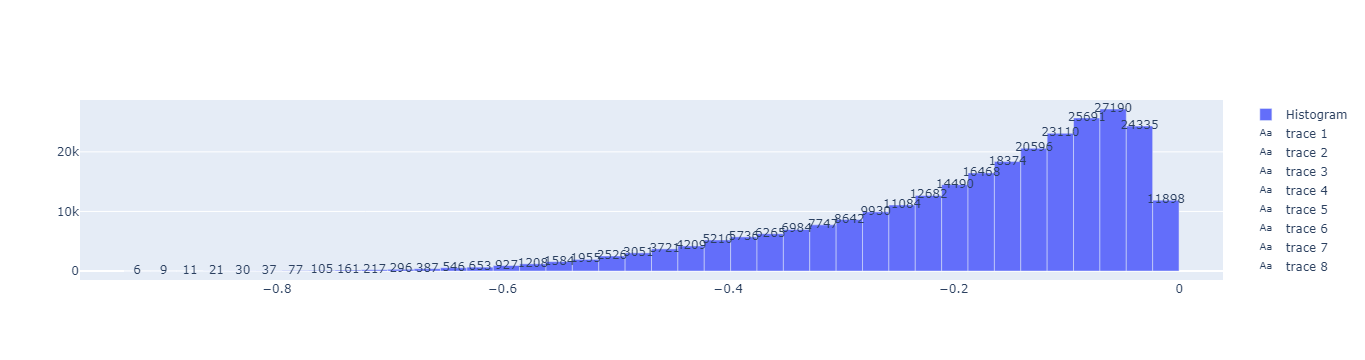

In [93]:
# Plot the figure
counts, bins = np.histogram(df_interest['ScoreChange'], bins=40)
bin_midpoints = bins[:-1] + np.diff(bins)/2

fig = go.Figure()

fig.add_trace(go.Bar(
    x=bin_midpoints,
    y=counts,
    width=np.diff(bins), # makes bars have correct widths
    name='Histogram'
))
# add text labels for counts
for i in range(len(counts)):
    fig.add_trace(go.Scatter(
        x=[bin_midpoints[i]],
        y=[counts[i]],
        text=[str(counts[i])],
        mode='text',
    ))

fig.show()

In [94]:
df_interest = df_interest[(df_interest['ScoreChange']>0.75)|(df_interest['ScoreChange']<-0.75)]
df_interest

,chr,strand,core_prom_coordinates,Ensemble_Transcript_ID,RS_ID,variant_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,ScoreChange,LogOddRatio
21000,chr11,-,57567628-57567717,ENST00000287156,rs1565162093,57567654,57567654,.,TCAGGACTCTAGTAATACAGGCATCAAATTATGGGATGGGCTATGG...,GGCACCCGTGGCCTCCAGCAGGACCGAGCTCCGACCCGCGACACAG...,GGCACCCGTGGCCTCCAGCAGGACCGTCAGGACTCTAGTAATACAG...,0.989888,0.069167,-0.911410,10.363422
50829,chr11,-,62573847-62573936,ENST00000329251,rs1422615634,62573849,62573850,C,A,TTCCGCAAAGAAAGGGGGTGGGGTTCTCGGCGCTGCCGCAAAGTAA...,TTACGCAAAGAAAGGGGGTGGGGTTCTCGGCGCTGCCGCAAAGTAA...,0.941586,0.117853,-0.775616,6.914747
65434,chr11,-,507198-507287,ENST00000354420,rs1850344640,507201,507202,G,A,CGTGTCGACAACCCCACCCGCCAGTCAGCGGCGCGGGCGTGTTCGA...,CGTATCGACAACCCCACCCGCCAGTCAGCGGCGCGGGCGTGTTCGA...,0.931574,0.095865,-0.778524,7.004498
68431,chr11,-,27700411-27700500,ENST00000356660,rs1211895694,27700419,27700434,CGGCGGCAGCGTCGG,CGG,GGGCGCGGCGGCGGCAGCGTCGGGGACCCGGAGCTCCAGGCTGCGC...,GGGCGCGGCGGGGACCCGGAGCTCCAGGCTGCGCCTTGCGCCCGGG...,0.994169,0.164247,-0.825083,9.760899
99403,chr11,-,47176815-47176904,ENST00000395449,rs1409113356,47176820,47176821,C,A,AGAGTCTGGATTTCGGTCTTGTTCGGCTCCGCCGCCATTTTCTCTC...,AGAGTATGGATTTCGGTCTTGTTCGGCTCCGCCGCCATTTTCTCTC...,0.948752,0.140238,-0.767080,6.826528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9450261,chr2,-,60352972-60353061,ENST00000457668,rs867931062,60352973,60352974,G,C,AGGACCCGTAAGTCCTGCCTTGCATCCTCCCTCCCATCATTACAGC...,ACGACCCGTAAGTCCTGCCTTGCATCCTCCCTCCCATCATTACAGC...,0.918790,0.102022,-0.750439,6.637813
9471829,chr2,-,178451129-178451218,ENST00000463882,rs1405109950,178451189,178451189,.,TTTTAATTGTGATATATACTAGTATCTA,CCTCCTCCGACTCCCCCGCCTCCTGCTTGCGTTGCTCCAGCGAGGG...,CCTCCTCCGACTCCCCCGCCTCCTGCTTGCGTTGCTCCAGCGAGGG...,0.991314,0.071866,-0.911460,10.525371
9517643,chr2,+,27772145-27772234,ENST00000476552,rs1227351291,27772148,27772149,A,T,GGAAACCGCTCCCGAGAGGGGCAATGAATTGCCTGAGTAATGCGGC...,GGATACCGCTCCCGAGAGGGGCAATGAATTGCCTGAGTAATGCGGC...,0.889862,0.034007,-0.761592,7.842378
9568885,chr2,+,181498236-181498325,ENST00000490435,rs1226344014,181498245,181498246,A,G,CATTTGAGCAAAGTGCTGTGTCTATACTTCCTTAGTCAATGTTCTG...,CATTTGAGCGAAGTGCTGTGTCTATACTTCCTTAGTCAATGTTCTG...,0.930271,0.086288,-0.785133,7.142329


In [95]:
df_interest[['chr','core_prom_coordinates']].drop_duplicates()

,chr,core_prom_coordinates
21000,chr11,57567628-57567717
50829,chr11,62573847-62573936
65434,chr11,507198-507287
68431,chr11,27700411-27700500
99403,chr11,47176815-47176904
...,...,...
9450261,chr2,60352972-60353061
9471829,chr2,178451129-178451218
9517643,chr2,27772145-27772234
9568885,chr2,181498236-181498325


In [96]:
df_interest [['RS_ID', 'variant_start','variant_end']].drop_duplicates()

,RS_ID,variant_start,variant_end
21000,rs1565162093,57567654,57567654
50829,rs1422615634,62573849,62573850
65434,rs1850344640,507201,507202
68431,rs1211895694,27700419,27700434
99403,rs1409113356,47176820,47176821
...,...,...,...
9401870,rs1670392990,16666046,16666046
9450261,rs867931062,60352973,60352974
9517643,rs1227351291,27772148,27772149
9568885,rs1226344014,181498245,181498246


In [77]:
# df_interest = df_interest[df_interest['variant_length']==1]
# df_interest

In [97]:
mean = df_interest['LogOddRatio'].mean()
std = df_interest['LogOddRatio'].std()
print(mean, std)

7.778945873170595 1.0429150934388884


In [98]:
max(df_interest['LogOddRatio'])

12.356903247324883

In [99]:
min(df_interest['LogOddRatio'])

6.559965008901846

5.693115686292818 9.86477606004837


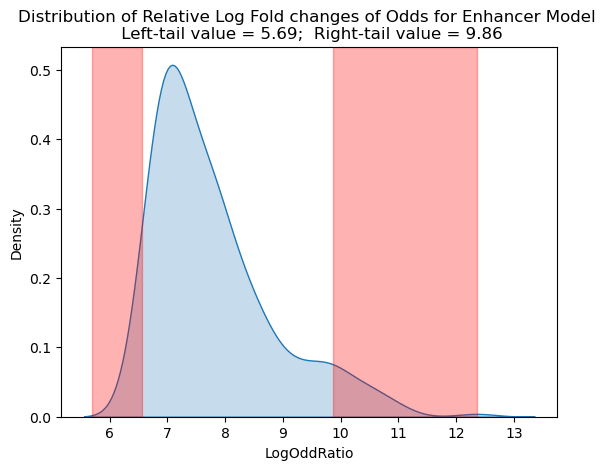

In [119]:
#print(z_score, p_value)
# Plot the distribution of 'LogOddRatio'

sns.kdeplot(df_interest['LogOddRatio'], fill=True, linewidth=1)

# # # Get the extreme values for a two tailed test at alpha = 0.05
# z_critical = norm.ppf(1 - 0.05/2) # two-tailed test at alpha = 0.05


# print(z_critical)
x1, x2 = mean + 2*std, mean - 2*std
# x1= 3.3219280948873626
# x2 =-3.3219280948873626
print(x2, x1)

# Shade the area for the two tailed test
plt.axvspan(min(df_interest['LogOddRatio']), x2, alpha=0.3, color='red')
plt.axvspan(x1, max(df_interest['LogOddRatio']), alpha=0.3, color='red')

# Add the observed z-score
# plt.text(-17, 0.5, f'Left-tail value = {x2:.2f}', color='blue', ha='left', va='center')
# plt.text(-3, 0.54, f'Right-tail value = {x1:.2f}', color='blue', ha='right', va='center')

plt.title(f'Distribution of Relative Log Fold changes of Odds for Enhancer Model \n Left-tail value = {x2:.2f};  Right-tail value = {x1:.2f}')
plt.savefig(output_path+ '/Enhancer_LogOddRatio_Distribution.png')
plt.show()

In [120]:
df_selected = df_interest[(df_interest['LogOddRatio']> x1)|(df_interest['LogOddRatio']<  x2)]

In [121]:
df_selected

,chr,strand,core_prom_coordinates,Ensemble_Transcript_ID,RS_ID,variant_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,ScoreChange,LogOddRatio
21000,chr11,-,57567628-57567717,ENST00000287156,rs1565162093,57567654,57567654,.,TCAGGACTCTAGTAATACAGGCATCAAATTATGGGATGGGCTATGG...,GGCACCCGTGGCCTCCAGCAGGACCGAGCTCCGACCCGCGACACAG...,GGCACCCGTGGCCTCCAGCAGGACCGTCAGGACTCTAGTAATACAG...,0.989888,0.069167,-0.911410,10.363422
668284,chr5,+,115841890-115841979,ENST00000316788,rs1554063601,115841971,115841973,AG,AGATTACCAGGCAG,GGGCCCCGCCCGACGGCTCGGGAGCGCGCGCGGTCGCGTGCGGGAG...,GGGCCCCGCCCGACGGCTCGGGAGCGCGCGCGGTCGCGTGCGGGAG...,0.995401,0.180684,-0.810969,9.938638
885006,chr5,+,9546125-9546214,ENST00000509788,rs1579722384,9546125,9546125,.,ATCTACTT,GGCGGGGAGCGGGGGACAGCCTGGGCCCACCCCCGCCCCGCCCCGC...,ATCTACTTGGCGGGGAGCGGGGGACAGCCTGGGCCCACCCCCGCCC...,0.997283,0.065405,-0.929347,12.356903
1469033,chr8,-,144354801-144354890,ENST00000562477,rs1588706753,144354802,144354802,.,GTTTACAAGACTGGTGTATTAGTTTATACT,GTCCGCTGCCGCCGCCCACTGCCCACAGCGGCACTCCTACCTCGGT...,GGTTTACAAGACTGGTGTATTAGTTTATACTTCCGCTGCCGCCGCC...,0.954935,0.010009,-0.902342,11.033420
3253435,chrX,-,149505262-149505351,ENST00000340855,rs1557340558,149505034,149505354,CTGTGGTCGAGTTGGCCTGCGTTTCGGATCCGAGGGCGACGCAGAC...,NaN,CGCCGCCCGGGCCCGCAGGCCCGGGCGCTGGCCGCAGCGCGAGTGC...,TCTAGAGGTGCGCGTCATCCTGCAGCAATAGGCGTGGCCGAGAGAC...,0.992872,0.116194,-0.870430,10.049201
3821940,chr6,-,163413916-163414005,ENST00000604200,rs967319193,163413916,163413917,C,A,CCTAGTCGGCTGCCGCCCCCGCCCCACGCAGGCGCGCTCCGGGGCC...,ACTAGTCGGCTGCCGCCCCCGCCCCACGCAGGCGCGCTCCGGGGCC...,0.956302,0.020528,-0.894883,10.028153
4334001,chr1,+,245002108-245002197,ENST00000479260,rs1026901324,245002119,245002120,G,C,CCTTTATGCTAGGGCCTGGGATACAACAGTGATGAGATAAGGCCTC...,CCTTTATGCTACGGCCTGGGATACAACAGTGATGAGATAAGGCCTC...,0.938777,0.015564,-0.866692,9.921666
4511007,chr1,+,53220618-53220707,ENST00000569869,rs1557724158,53220644,53220644,.,CCGTACGCCTAACCGCTAACATTACTGCAGGCCACCTACTCATGCA...,CTTTCCGGCGCGTCGTAAAAGGCGGGTGCCGTCTGCGCACCCTCAG...,CTTTCCGGCGCGTCGTAAAAGGCGGGCCGTACGCCTAACCGCTAAC...,0.958737,0.016219,-0.903626,10.460755
5128797,chr17,+,40819056-40819145,ENST00000301665,rs1905212309,40819065,40819154,CCGCCGCCGTGGCCGCCGCCGGAGCTTCCGCCGCCGGAGCTTCCGC...,CCGCCGCC,CCGCCGTGGCCGCCGCCGTGGCCGCCGCCGGAGCTTCCGCCGCCGG...,CCGCCGTGGCCGCCGCCTCCGCCGCCTCCGGAACTAAACGGGGTGA...,0.997656,0.180757,-0.814986,10.913957
7463380,chr18,+,11080-11169,ENST00000572573,rs1905101103,11117,11144,CGGCGCAGGCGCAGGCGCGGAGGGGCG,CG,GCCGGCGCAGGCGCAGGCGCGGAGGGGCGCGCAGCGCCGGCGCAGG...,GCCGGCGCAGGCGCAGGCGCGGAGGGGCGCGCAGCGCCGCGCCCGA...,0.996213,0.153570,-0.839453,10.501852


In [122]:
len(df_selected[['chr','core_prom_coordinates']].drop_duplicates())

15

In [123]:
len(df_selected[['RS_ID', 'variant_start','variant_end']].drop_duplicates())

16

In [124]:
df_selected.to_csv(output_path+"/Core_prom_candidate_variants.tsv", sep= "\t", index=False)
df_selected[['RS_ID', 'variant_start','variant_end']].drop_duplicates().reset_index(drop=True).to_csv(output_path+"/Unique_DBSNP_variants_ID.tsv" ,  sep= "\t", index=False)
df_selected[['chr','core_prom_coordinates']].drop_duplicates().reset_index(drop=True).to_csv(output_path + "/Unique_Core_proms_variants.tsv", sep="\t", index=False)

In [125]:
df_SNV = df_selected[(df_selected['ref_neucleotide'].str.len() < 5) & 
                          (df_selected['alternative_neucleotide'].str.len() < 5)]

In [126]:
df_SNV

,chr,strand,core_prom_coordinates,Ensemble_Transcript_ID,RS_ID,variant_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,ScoreChange,LogOddRatio
3821940,chr6,-,163413916-163414005,ENST00000604200,rs967319193,163413916,163413917,C,A,CCTAGTCGGCTGCCGCCCCCGCCCCACGCAGGCGCGCTCCGGGGCC...,ACTAGTCGGCTGCCGCCCCCGCCCCACGCAGGCGCGCTCCGGGGCC...,0.956302,0.020528,-0.894883,10.028153
4334001,chr1,+,245002108-245002197,ENST00000479260,rs1026901324,245002119,245002120,G,C,CCTTTATGCTAGGGCCTGGGATACAACAGTGATGAGATAAGGCCTC...,CCTTTATGCTACGGCCTGGGATACAACAGTGATGAGATAAGGCCTC...,0.938777,0.015564,-0.866692,9.921666


In [127]:
len(df_SNV[['RS_ID', 'variant_start','variant_end']].drop_duplicates())

2

In [128]:
len(df_SNV[['chr','core_prom_coordinates']].drop_duplicates())

2

In [129]:
df_SNV.to_csv(output_path+"/Core_prom_candidates_SNV.tsv", sep= "\t", index=False)
df_SNV[['RS_ID', 'variant_start','variant_end']].drop_duplicates().reset_index(drop=True).to_csv(output_path+"/Unique_RS_SNV_ID.tsv" ,  sep= "\t", index=False)
df_SNV[['chr','core_prom_coordinates']].drop_duplicates().reset_index(drop=True).to_csv(output_path + "/Unique_Core_proms_SNV.tsv", sep="\t", index=False)